# Visualizações para insights do projeto

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Carregar os dados
df = pd.read_csv('demissoes_cleaned.csv', parse_dates=['date'])

# Converter para ano-mês para facilitar a análise temporal
df['year_month'] = df['date'].dt.to_period('M')

# Configuração do estilo
sns.set_theme(style="whitegrid")

## 1. Evolução das demissões ao longo do tempo

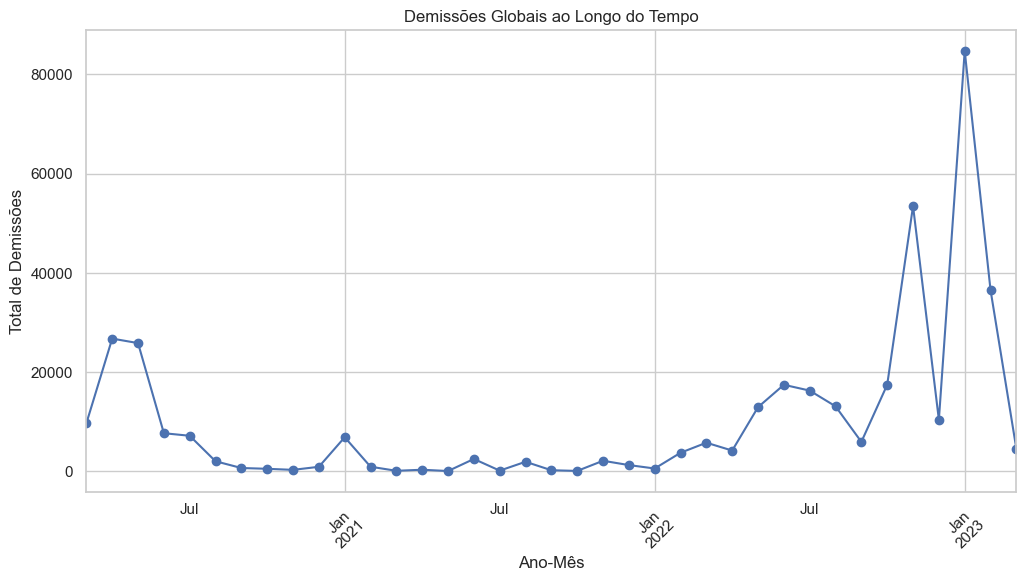

In [25]:
plt.figure(figsize=(12, 6))
df.groupby('year_month')['total_laid_off'].sum().plot(kind='line', marker='o')
plt.title("Demissões Globais ao Longo do Tempo")
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Demissões")
plt.xticks(rotation=45)
plt.show()

## 2. Setores mais afetados

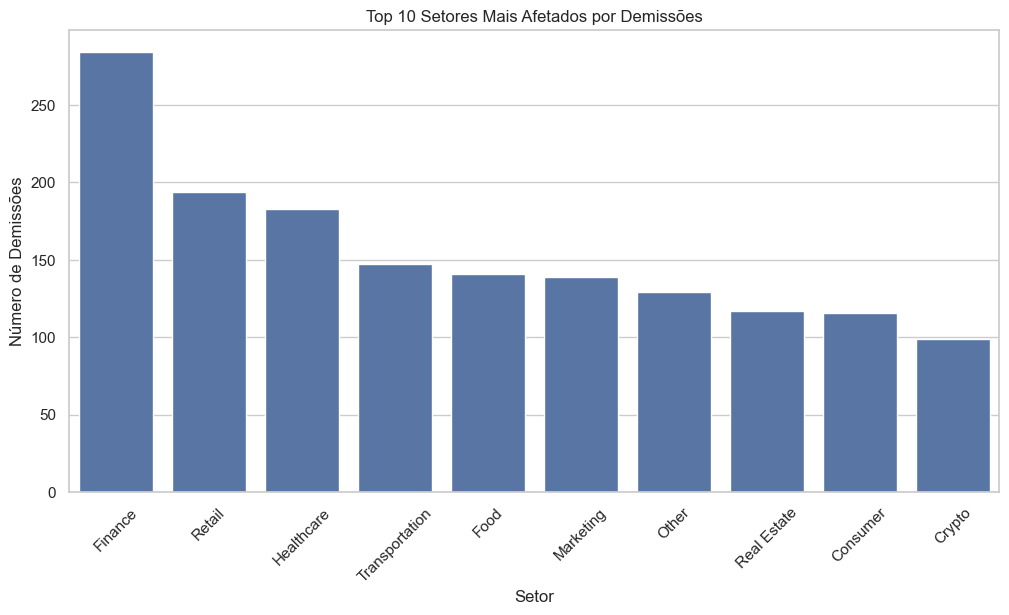

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['industry'].value_counts().index[:10], y=df['industry'].value_counts().values[:10])
plt.title("Top 10 Setores Mais Afetados por Demissões")
plt.xlabel("Setor")
plt.ylabel("Número de Demissões")
plt.xticks(rotation=45)
plt.show()

## 3. Demissões por localização (Países mais afetados)

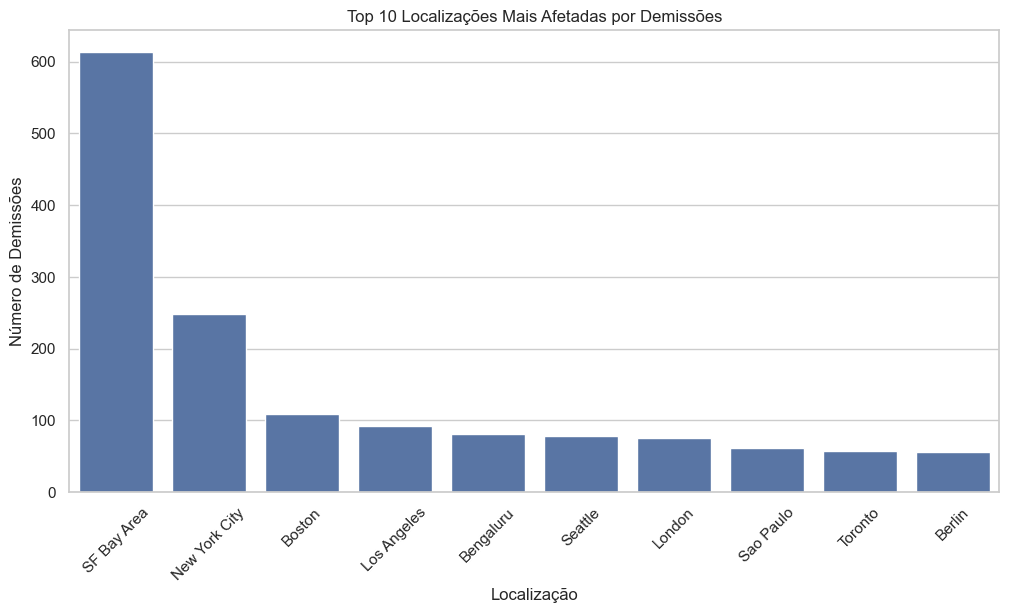

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['location'].value_counts().index[:10], y=df['location'].value_counts().values[:10])
plt.title("Top 10 Localizações Mais Afetadas por Demissões")
plt.xlabel("Localização")
plt.ylabel("Número de Demissões")
plt.xticks(rotation=45)
plt.show()

## 4. Distribuição percentual de demissões nas empresas

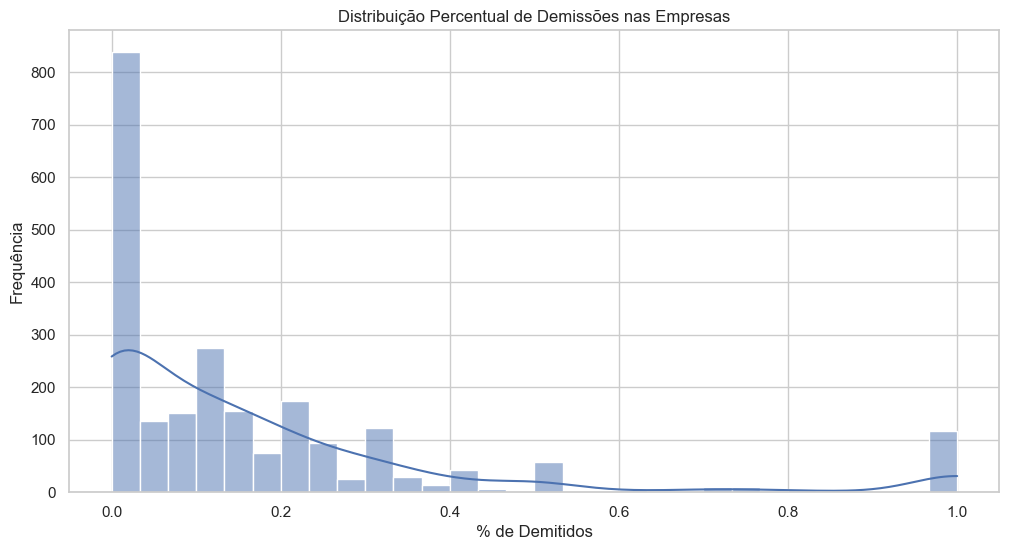

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(df['percentage_laid_off'].dropna(), bins=30, kde=True)
plt.title("Distribuição Percentual de Demissões nas Empresas")
plt.xlabel("% de Demitidos")
plt.ylabel("Frequência")
plt.show()

## 5. Total de Demissões por Empresa (top 10)

C:\Users\Ramon\AppData\Local\Temp\ipykernel_11592\4122590292.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_laid_off', y='company', data=demissoes_por_empresa, palette='viridis')


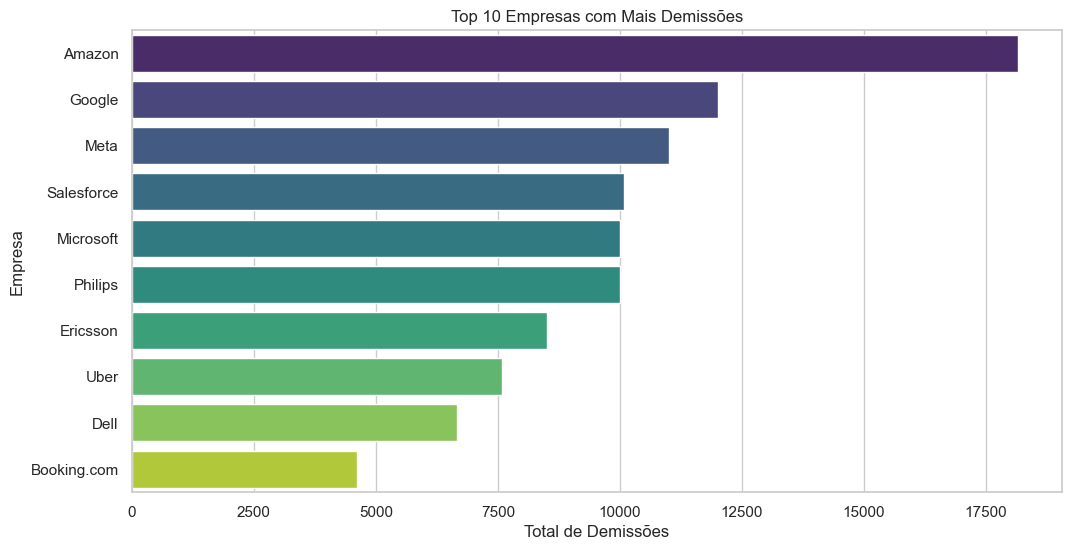

In [29]:
demissoes_por_empresa = df.groupby('company')['total_laid_off'].sum().reset_index()
demissoes_por_empresa = demissoes_por_empresa.sort_values(by='total_laid_off', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_laid_off', y='company', data=demissoes_por_empresa, palette='viridis')
plt.title('Top 10 Empresas com Mais Demissões')
plt.xlabel('Total de Demissões')
plt.ylabel('Empresa')
plt.show()

## 6. Total de demissões por estágio da empresa

C:\Users\Ramon\AppData\Local\Temp\ipykernel_11592\2837201389.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_laid_off', y='stage', data=demissoes_por_estagio, palette='coolwarm')


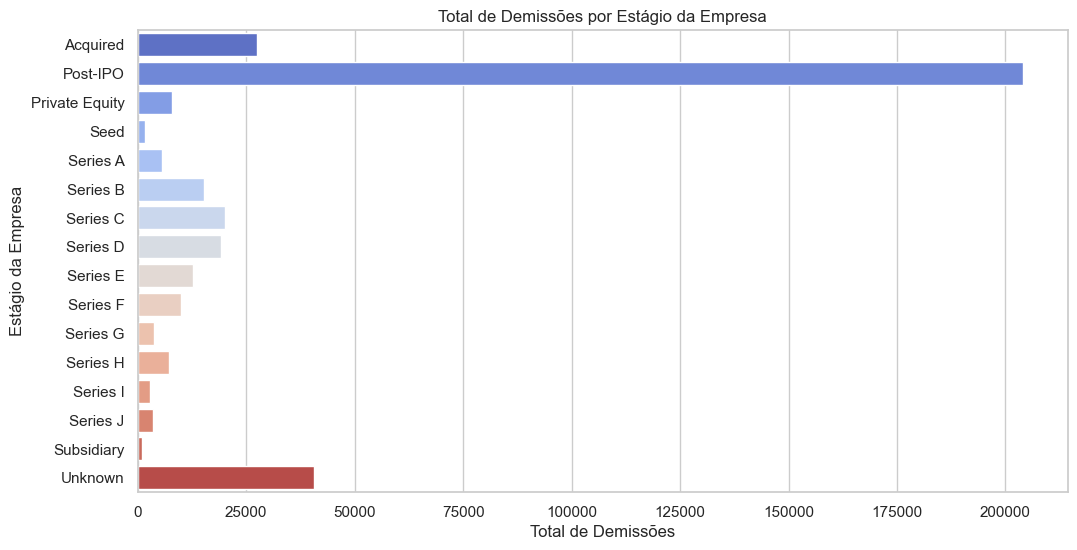

In [30]:
demissoes_por_estagio = df.groupby('stage')['total_laid_off'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='total_laid_off', y='stage', data=demissoes_por_estagio, palette='coolwarm')
plt.title('Total de Demissões por Estágio da Empresa')
plt.xlabel('Total de Demissões')
plt.ylabel('Estágio da Empresa')
plt.show()